# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually using Unsupervised ML

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [8]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [9]:
#feature values for the first five sample
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:

samples=iris_dataset['data']

In [11]:
# Import KMeans
from sklearn.cluster import KMeans
#KMeans instance with 3 clusters
model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


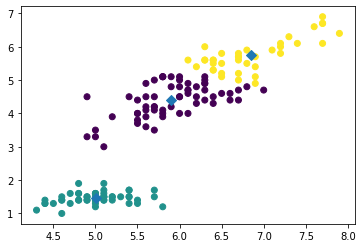

In [12]:

#Lets create array xs and ys of sepal length vs petal length
xs = samples[:,0]
ys = samples[:,2] 
plt.scatter(xs, ys, c=labels)
##k-means remembers the mean of each cluster (the "centroids") 
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]
#scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [13]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [14]:
species = iris_dataset['target']

In [15]:

df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

     labels  species
0         1        0
1         1        0
2         1        0
3         1        0
4         1        0
..      ...      ...
145       2        2
146       0        2
147       2        2
148       2        2
149       0        2

[150 rows x 2 columns]


In [16]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species   0   1   2
labels             
0         0  48  14
1        50   0   0
2         0   2  36


In [17]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

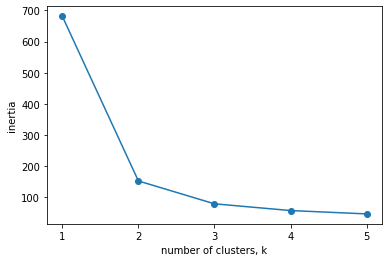

In [18]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.85144142614601



The cross-tabulation shows that the 3 varieties of species separate really well into 3 clusters